## Exploratory Data Analysis: STEAD Seismic Signal Dataset

The purpose of this notebook is to conduct exploratory data analysis on the STEAD Seismic Signal Dataset. 

To do this, the STEAD dataset was first downloaded locally from https://github.com/smousavi05/STEAD, and then preprocessed using the `data_preprocessing.py` module, as demonstrated in the `data_preprocessing.ipynb` notebook. The preprocessed data was saved to a local directory for analysis and model training.

### Environment setup

In [1]:
import sys
sys.path.append('../../../')

import cartopy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Load preprocessed data

In [2]:
# Load extracted raw signals
raw_signals = np.load('../../../data/STEAD/extracted_raw_signals_subsample_100000.npy')

# Load created spectrogram images
imgs = np.load('../../../data/STEAD/created_spectrogram_images_subsample_100000.npy')

# Load extracted raw signals
metadata = pd.read_feather('../../../data/STEAD/extracted_metadata_subsample_100000.feather')
metadata = metadata.reset_index()

In [3]:
metadata

,trace_name,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,chunk
0,B087.PB_20110415160922_EV,PB,B087,EH,33.495500,-116.602667,1139.0,500.0,manual,0.58,...,CI,None,0.14590,16.23,96.6,[15.89999962 17.20000076 6.5 ],[[1896.]],09:23.3,earthquake_local,1
1,B084.PB_20070610234247_EV,PB,B084,EH,33.611570,-116.456370,1271.0,400.0,manual,0.52,...,CI,None,0.97140,108.03,159.7,[27.79999924 27.39999962 29.29999924],[[2513.]],42:48.8,earthquake_local,1
2,AOPR.PR_20180718125903_EV,PR,AOPR,BH,18.346645,-66.753975,355.1,600.0,manual,0.19,...,None,None,0.54550,60.55,189.0,[26.89999962 27.29999924 24.60000038],[[2966.]],59:03.1,earthquake_local,1
3,B084.PB_20130324214626_EV,PB,B084,HH,33.611570,-116.456370,1271.0,900.0,manual,0.63,...,None,None,0.09953,11.07,182.0,[24.60000038 19.10000038 29.60000038],[[1534.]],46:27.9,earthquake_local,1
4,B086.PB_20121122004827_EV,PB,B086,EH,33.557500,-116.531000,1392.0,900.0,manual,0.62,...,CI,None,0.55260,61.45,320.4,[30.60000038 16.5 21. ],[[2323.]],48:28.2,earthquake_local,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,AC04.C1_20180116180542_NO,C1,AC04,HH,-28.204600,-71.073900,249.0,NaN,None,NaN,...,None,None,NaN,NaN,NaN,None,None,2018-01-16 18:05:42,noise,6
99996,LL07.C1_20180115145229_NO,C1,LL07,HH,-42.832350,-73.477850,53.5,NaN,None,NaN,...,None,None,NaN,NaN,NaN,None,None,2018-01-15 14:52:29,noise,6
99997,ALN.HT_20180116182600_NO,HT,ALN,HH,40.895699,26.049700,110.0,NaN,None,NaN,...,None,None,NaN,NaN,NaN,None,None,2018-01-16 18:26:00,noise,6
99998,BAB.NN_201805051855_NO,NN,BAB,HN,39.601330,-120.104000,2664.0,NaN,None,NaN,...,None,None,NaN,NaN,NaN,None,None,2018-05-05 18:55:00,noise,6


### Plot example waveform and spectrogram for an example signal

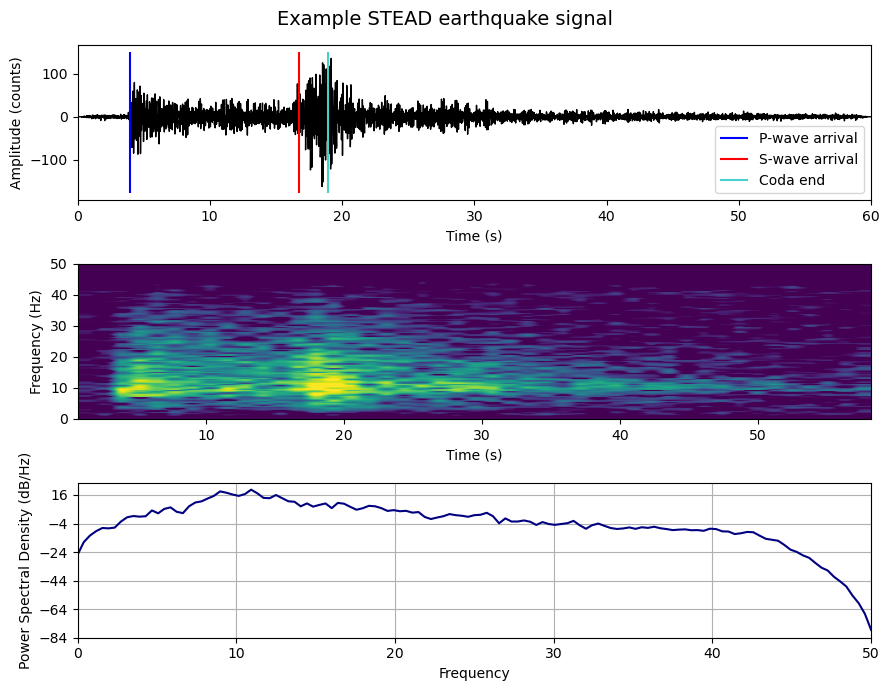

The p-wave for this waveform was picked by: manual
The s-wave for this waveform was picked by: manual


In [33]:
i = 1

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(9,7))
ax1.plot(np.linspace(0,60,6000),raw_signals[i][:,2],color='k',linewidth=1) # plot waveform
ymin, ymax = ax1.get_ylim()
ax1.vlines(metadata.iloc[i]['p_arrival_sample']/100, ymin, ymax, color='b', linewidth=1.5, label='P-wave arrival') # plot p-wave arrival time
ax1.vlines(metadata.iloc[i]['s_arrival_sample']/100, ymin, ymax, color='r', linewidth=1.5, label='S-wave arrival') # plot s-wave arrival time
ax1.vlines(int(metadata['coda_end_sample'].iloc[0].strip('[]').replace('.',''))/100, ymin, ymax, color='mediumturquoise', linewidth=1.5, label='Coda end')
ax1.set_xlim([0,60])
ax1.legend(loc='lower right',fontsize=10)
ax1.set_ylabel('Amplitude (counts)')
ax1.set_xlabel('Time (s)')
im = ax2.specgram(raw_signals[i][:,2],Fs=100,NFFT=256,cmap='viridis',vmin=-10,vmax=25); # plot spectrogram
ax2.set_ylabel('Frequency (Hz)')
ax2.set_xlabel('Time (s)')
ax3.psd(raw_signals[i][:,2], 256, 100, color='navy') # plot power spectral density
ax3.set_xlim([0,50])
plt.suptitle('Example STEAD earthquake signal', fontsize=14)
plt.tight_layout()
plt.savefig('../plots/waveform_spectrogram_plot.png',dpi=500)
plt.show()

print('The p-wave for this waveform was picked by: ' + metadata.iloc[i]['p_status'])
print('The s-wave for this waveform was picked by: ' + metadata.iloc[i]['s_status'])

### Plot earthquake magnitudes, depths, and distances from receiver

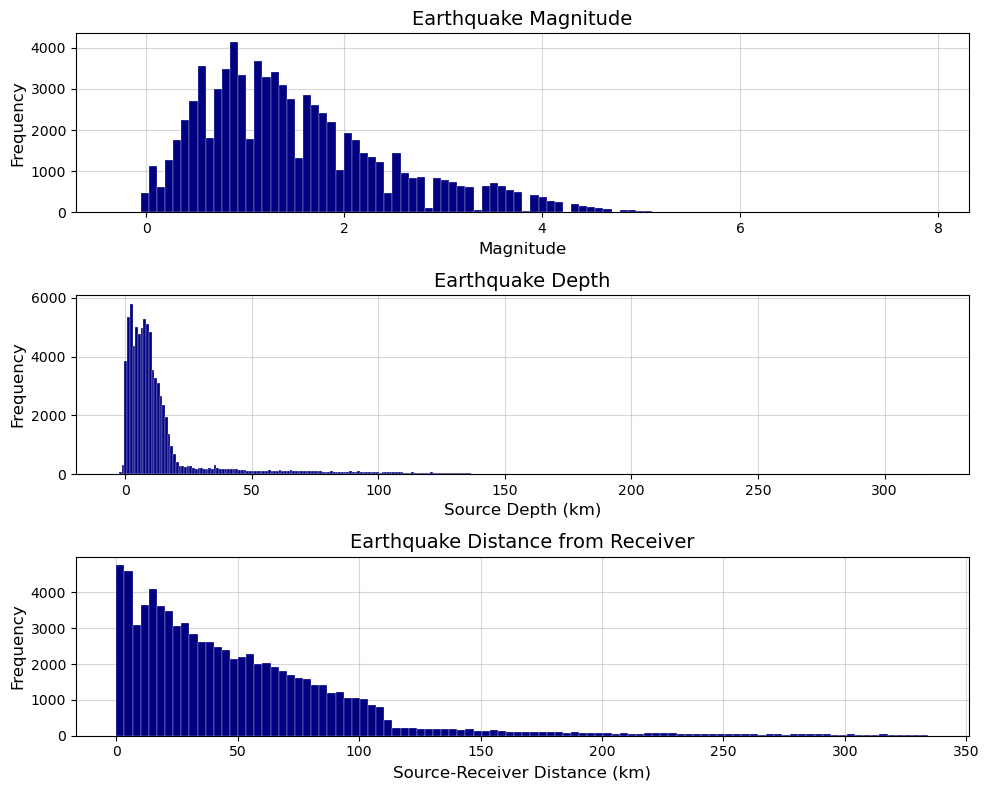

In [25]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,8))
ax1.grid(True, alpha=0.5, zorder=0)
ax1.hist(metadata['source_magnitude'],bins=100, color='navy', edgecolor='white', linewidth=0.2, zorder=3) # plot earthquake source magnitude
ax1.set_xlabel('Magnitude',fontsize=12)
ax1.set_ylabel('Frequency',fontsize=12)
ax1.set_title('Earthquake Magnitude',fontsize=14)
ax2.grid(True, alpha=0.5, zorder=0)
ax2.hist(metadata['source_depth_km'], bins=300, color='navy', edgecolor='white', linewidth=0.2, zorder=3)
ax2.set_xlabel('Source Depth (km)',fontsize=12) # plot earthquake source depth
ax2.set_ylabel('Frequency',fontsize=12)
ax2.set_title('Earthquake Depth',fontsize=14)
ax3.grid(True, alpha=0.5, zorder=10)
ax3.hist(metadata['source_distance_km'],bins=100, color='navy', edgecolor='white', linewidth=0.2, zorder=3)
ax3.set_xlabel('Source-Receiver Distance (km)',fontsize=12) # plot distance from earthquake to station
ax3.set_ylabel('Frequency',fontsize=12)
ax3.set_title('Earthquake Distance from Receiver',fontsize=14)
plt.tight_layout()
plt.savefig('../plots/mags_depths_distances.png',dpi=500)
plt.show()

### Plot earthquake locations

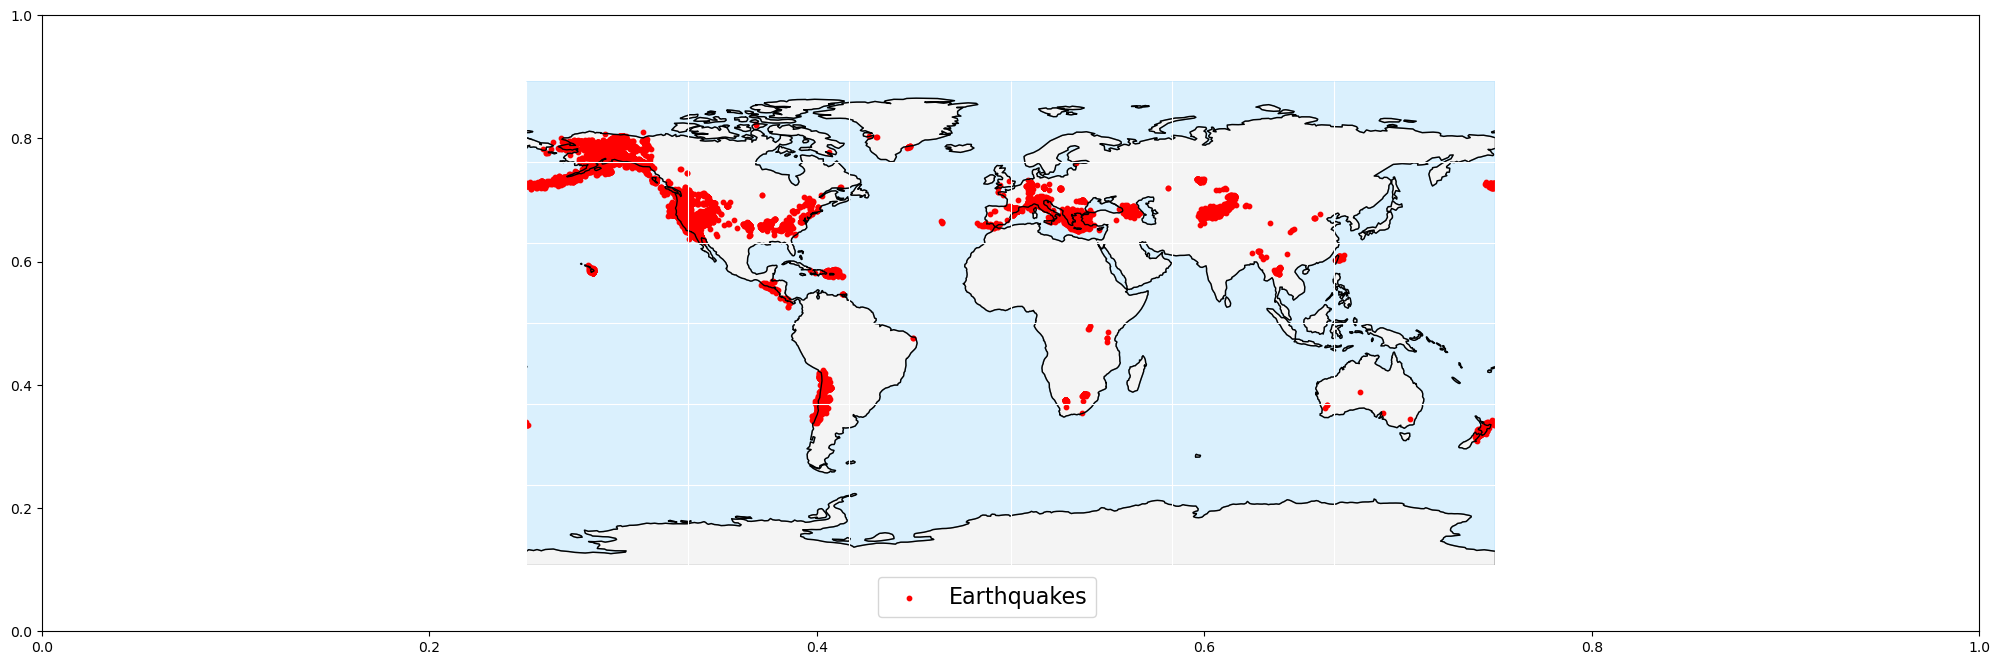

In [26]:
lats = metadata['source_latitude'] # get earthquake latitudes
lons = metadata['source_longitude'] # get earthquake longitudes
sizes = metadata['source_magnitude'] # get earthquake magnitudes to plot point sizes

fig, ax = plt.subplots(figsize=(25,8))
ax = plt.axes(projection=cartopy.crs.PlateCarree()) # choose a map projection using Cartopy
ax.axis('off')
ax.coastlines() # add coastlines to map
ax.add_feature(cartopy.feature.OCEAN,color='lightskyblue',alpha=0.3) # fill ocean with color
ax.add_feature(cartopy.feature.LAND, facecolor='gainsboro',edgecolor='black',alpha=0.3) # fill land with color
ax.gridlines(color='white')
ax.scatter(lons,lats,c='red',s=10, marker='o', transform=cartopy.crs.PlateCarree(),label='Earthquakes') # add points represnting each earthquake location
ax.set_xlim([-360,360])
ax.set_ylim([-90,90])
ax.legend(loc='lower right', bbox_to_anchor=(0.55,-0.13), fontsize=16)
plt.savefig('../plots/earthquake_map.png',dpi=500)
plt.show()

### Plot seismic station locations

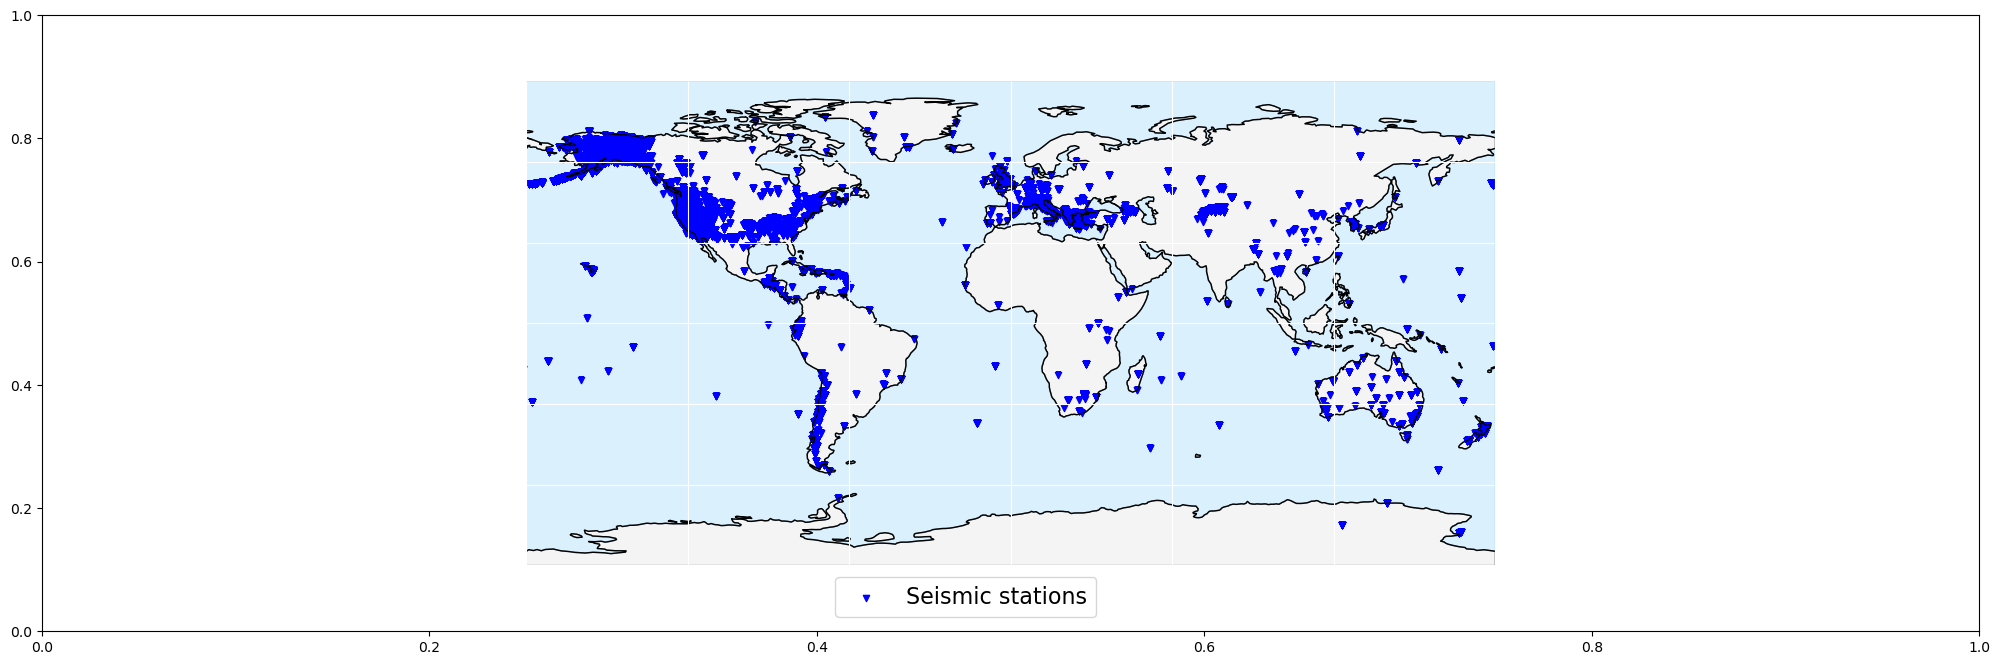

In [27]:
lats = metadata['receiver_latitude'] # get seismic station latitudes
lons = metadata['receiver_longitude'] # get seismic station longitudes

fig, ax = plt.subplots(figsize=(25,8))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN,color='lightskyblue',alpha=0.3)
ax.add_feature(cartopy.feature.LAND, facecolor='gainsboro',edgecolor='black',alpha=0.3)
ax.gridlines(color='white')
ax.scatter(lons,lats,c='blue',marker='v',s=20,transform=cartopy.crs.PlateCarree(),label='Seismic stations')
ax.set_xlim([-360,360])
ax.set_ylim([-90,90])
ax.legend(loc='lower right', bbox_to_anchor=(0.55,-0.13), fontsize=16)
ax.axis('off')
plt.savefig('../plots/station_map.png',dpi=500)
plt.show()

### Plot P-wave and S-wave arrival times

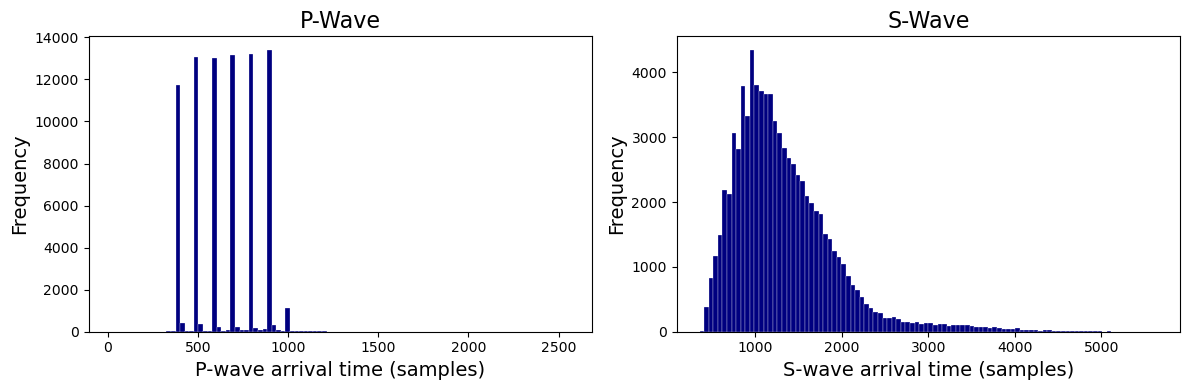

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.hist(metadata['p_arrival_sample'],bins=100, color='navy', edgecolor='white', linewidth=0.2) # plot earthquake source magnitude
ax1.set_xlabel('P-wave arrival time (samples)',fontsize=14)
ax1.set_ylabel('Frequency',fontsize=14)
ax1.set_title('P-Wave',fontsize=16)
ax2.hist(metadata['s_arrival_sample'], bins=100, color='navy', edgecolor='white', linewidth=0.2)
ax2.set_xlabel('S-wave arrival time (samples)',fontsize=14) # plot earthquake source depth
ax2.set_ylabel('Frequency',fontsize=14)
ax2.set_title('S-Wave',fontsize=16)
plt.tight_layout()
plt.savefig('../plots/arrival_times.png',dpi=500)
plt.show()

### Plot example earthquake signals

In [108]:
# Get random example earthquakes
example_earthquakes = metadata[metadata['trace_category']=='earthquake_local'].sample(4)
example_earthquake_waveforms = waveform_imgs[list(example_earthquakes.index)]
example_earthquake_spectrograms = spectrogram_imgs[list(example_earthquakes.index)]

# Get random example noise
example_noise = metadata[metadata['trace_category']=='noise'].sample(4)
example_noise_waveforms = waveform_imgs[list(example_noise.index)]
example_noise_spectrograms = spectrogram_imgs[list(example_noise.index)]

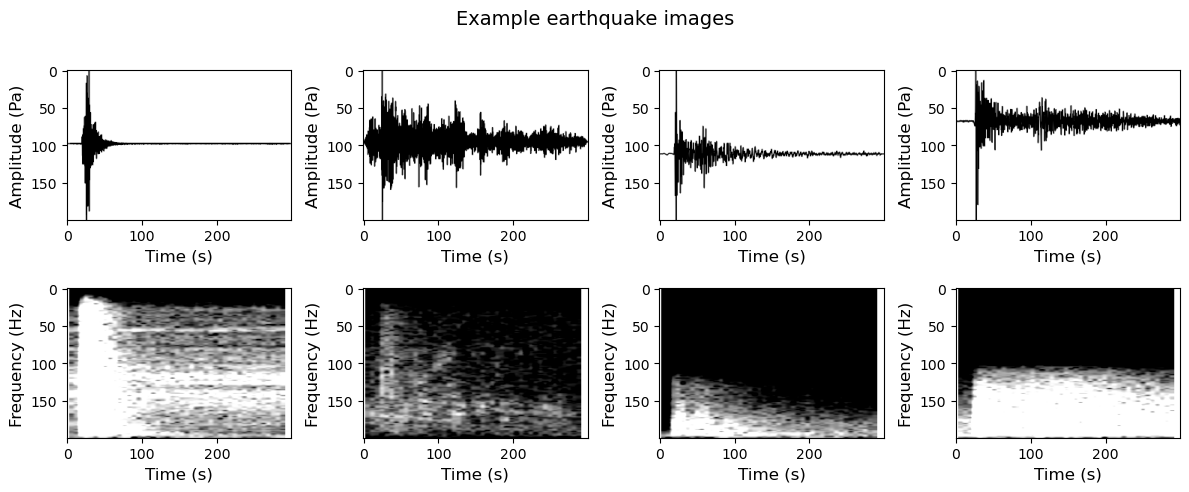

In [109]:
# Plot example earthquakes - waveforms and spectrograms
fig, axs = plt.subplots(2,4,figsize=(12,5))
count = 0
for i, ax in enumerate(axs.flatten()):
    if count < 4:
        ax.imshow(example_earthquake_waveforms[i])
        ax.set_ylabel('Amplitude (Pa)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)
        trace_name = example_earthquakes.iloc[i]['trace_name']
        mag = example_earthquakes.iloc[i]['source_magnitude']
        dist = example_earthquakes.iloc[i]['source_distance_km']
        ax.set_title(f'Trace {trace_name}\nMagnitude: {mag}\nDistance: {dist} km', fontsize=10)
    else:
        ax.imshow(example_earthquake_spectrograms[i-4])
        ax.set_ylabel('Frequency (Hz)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)   
    count += 1
plt.suptitle(f'Example earthquake images',fontsize=14)
plt.tight_layout()
plt.show()

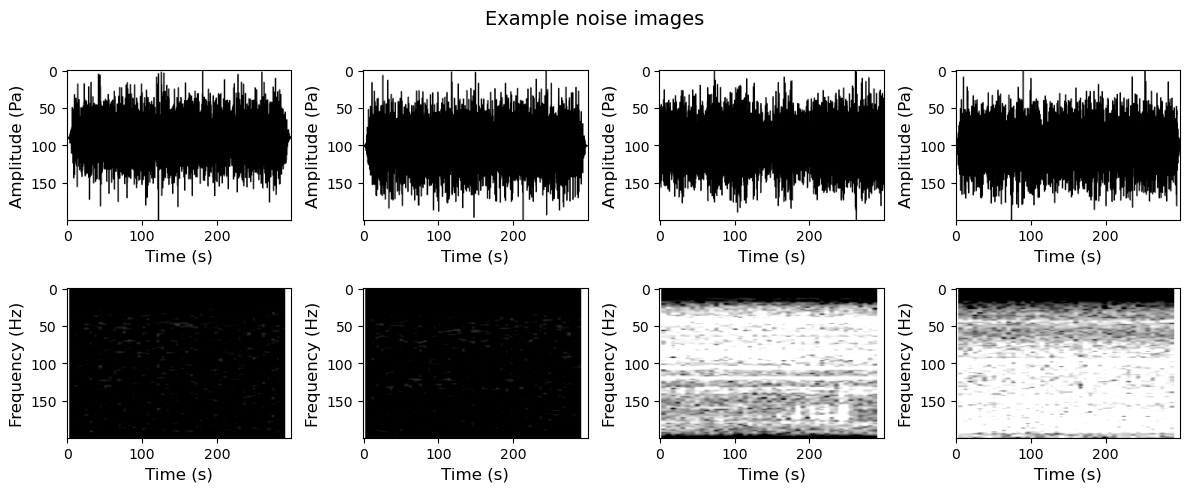

In [110]:
# Plot example noise - waveforms and spectrograms
fig, axs = plt.subplots(2,4,figsize=(12,5))
count = 0
for i, ax in enumerate(axs.flatten()):
    if count < 4:
        ax.imshow(example_noise_waveforms[i])
        ax.set_ylabel('Amplitude (Pa)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)
        trace_name = example_noise.iloc[i]['trace_name']
        ax.set_title(f'Trace {trace_name}', fontsize=10)
    else:
        ax.imshow(example_noise_spectrograms[i-4])
        ax.set_ylabel('Frequency (Hz)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)   
    count += 1
plt.suptitle(f'Example noise images',fontsize=14)
plt.tight_layout()
plt.show()